# Falcon 9 First Stage Landing Prediction


## Objectives


Performing exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data
*   Find best Hyperparameter for SVM, Classification Trees and Logistic Regression
*   Find the method performs best using test data


#### Importing Libraries and Defining Auxiliary Functions


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

#### Loading the dataframe


In [3]:
import requests
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = requests.get(URL)
text = io.StringIO(resp.text)

data = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp = requests.get(URL)
text = io.StringIO(resp.text)

X = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [7]:
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


Creating a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code> and assigning it to the variable <code>Y</code>. The output is a Pandas series (only one bracket df\['name of  column']).


In [8]:
Y = data['Class'].to_numpy()

Standardizing the data in <code>X</code> using `preprocessing.StandardScaler()` and `inplace`.


In [11]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaler.transform(X)


array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

Splitting the data for training and testing using the function <code>train_test_split</code>. 

The training data is divided into the training and validation sets. 

The models are trained using the training set and the hyperparameters are selected using the validation set as test set the function <code>GridSearchCV</code>.


Setting the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels: <code>X_train, X_test, Y_train, Y_test</code>


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [13]:
Y_test.shape

(18,)

## `Logistic Regression`


Creating a logistic regression <code>logreg_cv</code> with cv = 10 and a GridSearchCV object with the dictionary <code>parameters</code>.  Fitting the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'penalty': ['l1','l2'], 'C': [0.01,0.1,1], 'solver':['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, param_grid=parameters)

logreg_cv.fit(X_train, Y_train)

Displaying the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [21]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8190476190476191


Calculating the accuracy on the test data using the method <code>score</code>.


In [23]:
logreg_cv.score(X_test, Y_test)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.75


Lets look at the confusion matrix:


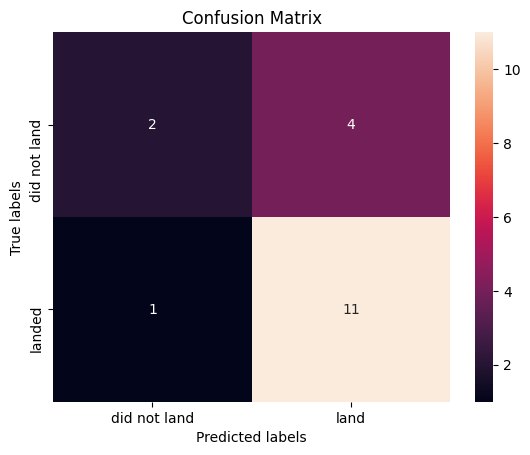

In [24]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

The confusion matrix points that logistic regression can distinguish between the different classes but there is a major problem with false positives.


## `Support Vector Machine`


Creating a support vector machine object and a <code>GridSearchCV</code> object <code>svm_cv</code> with cv - 10.  

Fitting the object to find the best parameters in the dictionary <code>parameters</code>.


In [26]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, param_grid=parameters)
svm_cv.fit(X_train, Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

Calculating the accuracy on the test set using the method <code>score</code>:


In [ ]:
svm_cv.score(X_test, Y_test)
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

Plotting the confusion matrix


In [ ]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## `Decision Tree`

Creating a decision tree classifier object and a <code>GridSearchCV</code> object <code>tree_cv</code> with cv = 10.  

Fitting the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, param_grid=parameters)
tree_cv.fit(X_train, Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

Calculating the accuracy of tree_cv on the test set using the method <code>score</code>:

In [ ]:
tree_cv.score(X_test, Y_test)
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

Plotting the confusion matrix.

In [ ]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## `K Nearest Neighbors`

Creating a k nearest neighbors object and a <code>GridSearchCV</code> object <code>knn_cv</code> with cv = 10.  

Fitting the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, param_grid=parameters)
knn_cv.fit(X_train, Y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("knn accuracy :",knn_cv.best_score_)

Calculating the accuracy of knn_cv on the test data using the method <code>score</code>:


In [ ]:
knn_cv.score(X_test, Y_test)
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

Plotting the confusion matrix


In [ ]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Performance comparison:


In [ ]:
print("log reg accuracy :",logreg_cv.best_score_)
print("svm accuracy :",svm_cv.best_score_)
print("tree accuracy :",tree_cv.best_score_)
print("knn accuracy :",knn_cv.best_score_)